In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


/kaggle/input/scrabble-player-rating/sample_submission.csv
/kaggle/input/scrabble-player-rating/games.csv
/kaggle/input/scrabble-player-rating/turns.csv
/kaggle/input/scrabble-player-rating/train.csv
/kaggle/input/scrabble-player-rating/test.csv


# Data Overview

Firstly, let's have a quick overview of the data given to familiarise ourselves with its structure.

In [2]:
sample_submission = pd.read_csv("/kaggle/input/scrabble-player-rating/sample_submission.csv")
train = pd.read_csv("/kaggle/input/scrabble-player-rating/train.csv")
test = pd.read_csv("/kaggle/input/scrabble-player-rating/test.csv")
games = pd.read_csv("/kaggle/input/scrabble-player-rating/games.csv")
turns = pd.read_csv("/kaggle/input/scrabble-player-rating/turns.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100820 entries, 0 to 100819
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   game_id   100820 non-null  int64 
 1   nickname  100820 non-null  object
 2   score     100820 non-null  int64 
 3   rating    100820 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.1+ MB


In [3]:
train.describe()

,game_id,score,rating
count,100820.000000,100820.000000,100820.000000
mean,36367.328605,399.029022,1875.592938
std,21020.288705,75.184778,231.791016
min,1.000000,-64.000000,1033.000000
25%,18139.000000,352.000000,1664.000000
50%,36339.500000,398.000000,1907.000000
75%,54625.000000,445.000000,2060.000000
max,72773.000000,1132.000000,2510.000000


In [4]:
train.head()

,game_id,nickname,score,rating
0,1,BetterBot,335,1637
1,1,stevy,429,1500
2,3,davidavid,440,1811
3,3,BetterBot,318,2071
4,4,Inandoutworker,119,1473


In the "train.csv" file there is score and rating data for **some** of the games - the remaining ones being in the "test.csv" file. There are two rows per game, each containing a player's nickname, score and rating.

In [5]:
turns.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005498 entries, 0 to 2005497
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   game_id      2005498 non-null  int64 
 1   turn_number  2005498 non-null  int64 
 2   nickname     2005498 non-null  object
 3   rack         1936108 non-null  object
 4   location     1873259 non-null  object
 5   move         2005044 non-null  object
 6   points       2005498 non-null  int64 
 7   score        2005498 non-null  int64 
 8   turn_type    2005103 non-null  object
dtypes: int64(4), object(5)
memory usage: 137.7+ MB


In [6]:
turns.describe()

,game_id,turn_number,points,score
count,2.005498e+06,2.005498e+06,2.005498e+06,2.005498e+06
mean,3.640032e+04,1.453798e+01,2.900326e+01,2.270914e+02
std,2.100559e+04,8.434285e+00,2.210145e+01,1.343110e+02
min,1.000000e+00,1.000000e+00,-2.210000e+02,-6.400000e+01
25%,1.820800e+04,7.000000e+00,1.600000e+01,1.130000e+02
50%,3.640100e+04,1.400000e+01,2.400000e+01,2.240000e+02
75%,5.460900e+04,2.100000e+01,3.600000e+01,3.320000e+02
max,7.277300e+04,7.500000e+01,3.110000e+02,1.171000e+03


In [7]:
turns.head()

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play


The "turns.csv" file contains data for all turns played in all games. It's a larger dataframe containing tons of interesting data. We will probably be able to engineer several useful features from it. 

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72773 entries, 0 to 72772
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                72773 non-null  int64  
 1   first                  72773 non-null  object 
 2   time_control_name      72773 non-null  object 
 3   game_end_reason        72773 non-null  object 
 4   winner                 72773 non-null  int64  
 5   created_at             72773 non-null  object 
 6   lexicon                72773 non-null  object 
 7   initial_time_seconds   72773 non-null  int64  
 8   increment_seconds      72773 non-null  int64  
 9   rating_mode            72773 non-null  object 
 10  max_overtime_minutes   72773 non-null  int64  
 11  game_duration_seconds  72773 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 6.7+ MB


In [9]:
games.describe()

,game_id,winner,initial_time_seconds,increment_seconds,max_overtime_minutes,game_duration_seconds
count,72773.000000,72773.000000,72773.000000,72773.00000,72773.000000,72773.000000
mean,36387.000000,0.350734,1198.034230,0.22856,2.143707,484.069347
std,21007.899907,0.484859,713.185219,2.54802,2.989853,333.563128
min,1.000000,-1.000000,15.000000,0.00000,0.000000,7.962989
25%,18194.000000,0.000000,900.000000,0.00000,1.000000,250.172459
50%,36387.000000,0.000000,1200.000000,0.00000,1.000000,399.834150
75%,54580.000000,1.000000,1200.000000,0.00000,1.000000,633.424285
max,72773.000000,1.000000,3600.000000,60.00000,10.000000,4444.821645


In [10]:
games.head()

,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722


In [11]:
for categorical_column in ["time_control_name", "game_end_reason", "lexicon", "rating_mode"]:
    print(games[categorical_column].value_counts(), "\n\n")

regular       60282
rapid          6652
blitz          4468
ultrablitz     1371
Name: time_control_name, dtype: int64 


STANDARD              67987
RESIGNED               2346
TIME                   2202
CONSECUTIVE_ZEROES      238
Name: game_end_reason, dtype: int64 


CSW21     44594
NWL20     21250
ECWL       6925
NSWL20        4
Name: lexicon, dtype: int64 


RATED     54076
CASUAL    18697
Name: rating_mode, dtype: int64 




The "games.csv" file contains a sort of metadata for each game with mostly self-explanatory data. The *lexicon* used in each game is like a dictionary used to determine whether any word that a player attempts to play is allowed or not. If you have ever played the tabletop version of scrabble with family, you will most likely be familiar with the heated debates of whether the word your uncle played exists or not, and whether it's a legal move to put it down. The lexicon is what resolves such arguments. It provides a reference of what is considered a legal word in the game.

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44726 entries, 0 to 44725
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   game_id   44726 non-null  int64  
 1   nickname  44726 non-null  object 
 2   score     44726 non-null  int64  
 3   rating    22363 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ MB


In [13]:
test.describe()

,game_id,score,rating
count,44726.000000,44726.000000,22363.000000
mean,36431.342664,401.016791,2002.547780
std,20979.878622,79.889084,163.343333
min,2.000000,0.000000,1407.000000
25%,18347.500000,352.000000,1891.000000
50%,36474.000000,401.000000,2006.000000
75%,54477.750000,450.000000,2127.000000
max,72769.000000,1171.000000,2377.000000


In [14]:
test.head()

,game_id,nickname,score,rating
0,2,Super,488,NaN
1,2,BetterBot,401,2000.0
2,7,STEEBot,377,2082.0
3,7,Priya1,379,NaN
4,11,STEEBot,334,1829.0


In [15]:
bot_names = list(test.loc[test.rating.notna()].nickname.unique())  # These are the bots that play in the matches.
print(bot_names)

['BetterBot', 'STEEBot', 'HastyBot']


In [16]:
sample_submission.head()

,game_id,rating
0,2,1790.322674
1,7,1790.322674
2,11,1790.322674
3,14,1790.322674
4,27,1790.322674


# Feature Engineering

Here's a list of some ideas for features that intuitively seem like they might be informative:
 - final score in game
 - total time played
 - total number of turns
 - average score per turn
 - average score per second
 - highest scoring turn
 - lowest scoring turn
 - difference between highest and lowest scoring turns
 - total score in first X turns
 - total score in last X turns
 - total number of types of turns for *Exchange*, *Play*, *Pass*, *End*, *Timeout*.
 - fraction of initial game time used.
 

Many of these can be easily implemented using aggregate functions on groupings of the turns dataframe.

In [17]:
total_turns = turns.groupby(["game_id", "nickname"]).turn_number.count()
total_turns.head()

game_id  nickname 
1        BetterBot    13
         stevy        14
2        BetterBot    12
         Super        14
3        BetterBot    13
Name: turn_number, dtype: int64

In [18]:
def sum_first_five(series):
    return sum(series.values[::-1][:5])

first_five_turn_point_sum = turns.groupby(["game_id", "nickname"]).points.agg(sum_first_five)
first_five_turn_point_sum.head()

game_id  nickname 
1        BetterBot    122
         stevy         95
2        BetterBot    167
         Super         97
3        BetterBot    151
Name: points, dtype: int64

In [19]:
max_points = turns.groupby(["game_id", "nickname"]).points.max()
max_points.head()

game_id  nickname 
1        BetterBot    68
         stevy        98
2        BetterBot    85
         Super        94
3        BetterBot    76
Name: points, dtype: int64

In [20]:
min_points = turns.groupby(["game_id", "nickname"]).points.min()
min_points.head()

game_id  nickname 
1        BetterBot    8
         stevy        2
2        BetterBot    8
         Super        0
3        BetterBot    0
Name: points, dtype: int64

Let's combine these features in a dataframe and join it with the games data.

In [21]:
game_player_data = total_turns.reset_index()
game_player_data.rename(columns={"turn_number": "total_turns"}, inplace=True)
game_player_data["first_five_turns_points"] = first_five_turn_point_sum.reset_index()["points"]
game_player_data["max_points_turn"] = max_points.reset_index()["points"]
game_player_data["min_points_turn"] = min_points.reset_index()["points"]
game_player_data["max_min_difference"] = game_player_data.max_points_turn - game_player_data.min_points_turn
game_player_data = game_player_data.join(games.set_index("game_id"), how="left", on="game_id")
game_player_data["time_used"] = game_player_data.game_duration_seconds / game_player_data.initial_time_seconds
game_player_data.head()


,game_id,nickname,total_turns,first_five_turns_points,max_points_turn,min_points_turn,max_min_difference,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,time_used
0,1,BetterBot,13,122,68,8,60,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,0.562370
1,1,stevy,14,95,98,2,96,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,0.562370
2,2,BetterBot,12,167,85,8,77,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418,0.101171
3,2,Super,14,97,94,0,94,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418,0.101171
4,3,BetterBot,13,151,76,0,76,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262,0.546965


Let's also add the cruical *score* and *rating* columns by merging with the train dataframe to create our initial training dataset.

In [22]:
train_data = pd.merge(train, game_player_data, how="left", left_on=["game_id", "nickname"], right_on=["game_id", "nickname"])
train_data["points_per_turn"] = train_data.score / train_data.total_turns
train_data["points_per_second"] = train_data.score / train_data.game_duration_seconds
train_data.head()


,game_id,nickname,score,rating,total_turns,first_five_turns_points,max_points_turn,min_points_turn,max_min_difference,first,...,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,time_used,points_per_turn,points_per_second
0,1,BetterBot,335,1637,13,122,68,8,60,BetterBot,...,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,0.562370,25.769231,0.496411
1,1,stevy,429,1500,14,95,98,2,96,BetterBot,...,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,0.562370,30.642857,0.635702
2,3,davidavid,440,1811,14,136,103,13,90,BetterBot,...,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262,0.546965,31.428571,0.893822
3,3,BetterBot,318,2071,13,151,76,0,76,BetterBot,...,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262,0.546965,24.461538,0.645989
4,4,Inandoutworker,119,1473,14,20,26,0,26,BetterBot,...,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141,0.097461,8.500000,0.339166


In [23]:
# Let's relabel the winner and first columns in a way that makes them meaningful to ML models.
def replace_winner(row):
    """Set the value of winner to 1 if the player won, -1 if the lost, or 0 if it was a draw."""
    # Locate opponent as the row with the same game_id but different nickname.
    opponent_row = train_data.loc[(train_data.game_id == row.loc["game_id"]) & (train_data.nickname != row.loc["nickname"])]
    
    # Compare scores. Set the winner to 1, the loser to -1 and if a tie, give both 0.
    if row.loc["score"] > opponent_row["score"].values:
        row.loc["winner"] = 1
    elif row.loc["score"] < opponent_row["score"].values:
        row.loc["winner"] = -1
    else:
        row.loc["winner"] = 0
    return row

def replace_first(row):
    """Set the value in column first to 1 if the the player went first in their game,
    or to 0 if they went second."""
    if row.loc["first"] == row.loc["nickname"]:
        row.loc["first"] = 1
    else:
        row.loc["first"] = 0
    return row

def relabel_values(row):
    row = replace_winner(row)
    row = replace_first(row)
    return row

X = train_data.apply(relabel_values, axis=1)
X.head()


,game_id,nickname,score,rating,total_turns,first_five_turns_points,max_points_turn,min_points_turn,max_min_difference,first,...,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,time_used,points_per_turn,points_per_second
0,1,BetterBot,335,1637,13,122,68,8,60,1,...,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,0.562370,25.769231,0.496411
1,1,stevy,429,1500,14,95,98,2,96,0,...,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,0.562370,30.642857,0.635702
2,3,davidavid,440,1811,14,136,103,13,90,0,...,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262,0.546965,31.428571,0.893822
3,3,BetterBot,318,2071,13,151,76,0,76,1,...,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262,0.546965,24.461538,0.645989
4,4,Inandoutworker,119,1473,14,20,26,0,26,0,...,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141,0.097461,8.500000,0.339166


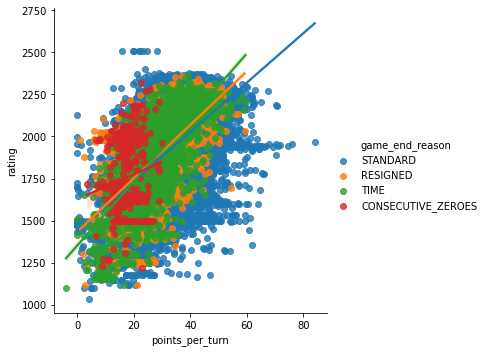

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot(x="points_per_turn", y="rating", data=train_data, hue="game_end_reason")

Time to encode the categorical features in the dataset. All of the useful ones are low cardinality, so it makes sense to one-hot encode them. Even though *time_control_name*, for example, could be encoded ordinally, this is unlikely to prove much more useful in this scenario due to the low cardinality of the feature. 

In [25]:
nominal_features = ["time_control_name", "game_end_reason", "lexicon", "rating_mode"]
non_informative_features = ["created_at", "nickname", "game_id"]
one_hot_encoded_features = pd.get_dummies(X[nominal_features])
X_encoded = pd.concat((X, one_hot_encoded_features), axis=1)
X_encoded.drop(columns=nominal_features + non_informative_features, axis=1, inplace=True)
y = X_encoded.pop("rating")
X_encoded.head()


,score,total_turns,first_five_turns_points,max_points_turn,min_points_turn,max_min_difference,first,winner,initial_time_seconds,increment_seconds,...,game_end_reason_CONSECUTIVE_ZEROES,game_end_reason_RESIGNED,game_end_reason_STANDARD,game_end_reason_TIME,lexicon_CSW21,lexicon_ECWL,lexicon_NSWL20,lexicon_NWL20,rating_mode_CASUAL,rating_mode_RATED
0,335,13,122,68,8,60,1,-1,1200,0,...,0,0,1,0,0,0,0,1,1,0
1,429,14,95,98,2,96,0,1,1200,0,...,0,0,1,0,0,0,0,1,1,0
2,440,14,136,103,13,90,0,1,900,0,...,0,0,1,0,1,0,0,0,0,1
3,318,13,151,76,0,76,1,-1,900,0,...,0,0,1,0,1,0,0,0,0,1
4,119,14,20,26,0,26,0,-1,3600,0,...,0,1,0,0,1,0,0,0,1,0


# Feature Usefulness Investigation

Now that all our data is usable by the model and mutual information tools, we can investigate the usefulness of different features.

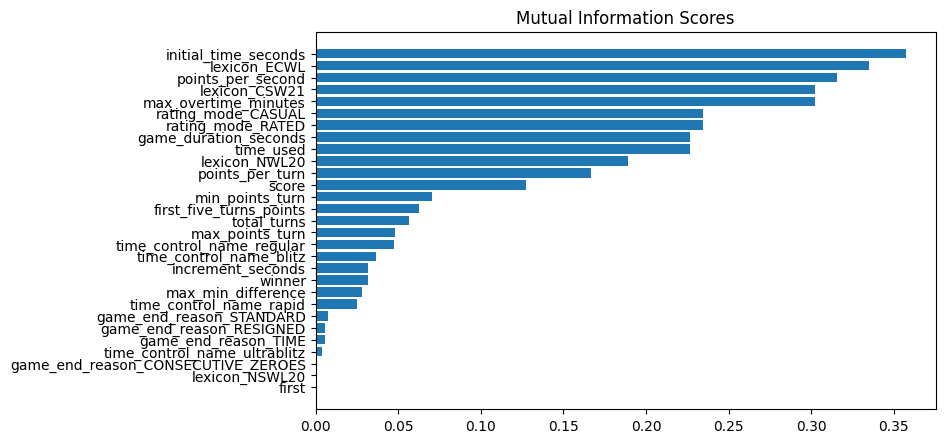

In [26]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

X_encoded = X_encoded.astype(float)
discrete_features = X_encoded.dtypes == float

mi_scores = make_mi_scores(X_encoded, y, discrete_features)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

# Dataset Evaluation

Let's check out the RMSE from a cross validation using a default random forest regressor.

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

def evaluate_dataset(X, y, model=RandomForestRegressor(random_state=1)):
    scores = -1 * cross_val_score(model, X, y, scoring="neg_root_mean_squared_error")
    return scores.mean()

evaluate_dataset(X_encoded, y)

123.25446495138542

The score looks promising! But let's see if we can perform better with gradient boosting.

In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, random_state=42)

xgb_reg = XGBRegressor(
    n_estimators=1000, early_stopping_rounds=10, learning_rate=0.2, eval_metric="rmse"
)

xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
print(f"Final validation loss: {xgb_reg.best_score}")

Final validation loss: 120.93986309116518


That's even better. 

# Should We Have Rescaled?

One step we skipped during our data preprocessing was rescaling the numerical features. Now that we have a base model performing decently, let's see if it improves the score.

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_features = [
    "score", "total_turns", "points_per_turn", "initial_time_seconds", "game_duration_seconds",
    "points_per_second", "time_used", "max_points_turn", "min_points_turn"
]

num_transformer = ColumnTransformer([
    ("numeric rescaler", StandardScaler(), numeric_features)
])

numeric_features_rescaled_train = pd.DataFrame(num_transformer.fit_transform(X_encoded))
numeric_features_rescaled_train.columns = numeric_features
numeric_features_rescaled_train.index = X_encoded.index

X_encoded_rescaled = X_encoded.drop(columns=numeric_features)

X_encoded_rescaled = pd.concat((numeric_features_rescaled_train, X_encoded_rescaled), axis="columns")

X_encoded_rescaled.head()

,score,total_turns,points_per_turn,initial_time_seconds,game_duration_seconds,points_per_second,time_used,max_points_turn,min_points_turn,first_five_turns_points,...,game_end_reason_CONSECUTIVE_ZEROES,game_end_reason_RESIGNED,game_end_reason_STANDARD,game_end_reason_TIME,lexicon_CSW21,lexicon_ECWL,lexicon_NSWL20,lexicon_NWL20,rating_mode_CASUAL,rating_mode_RATED
0,-0.851626,-0.396637,-0.526218,-0.023616,0.551731,-0.747107,0.387157,-0.409480,0.311226,122.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.398633,0.099325,0.144761,-0.023616,0.551731,-0.597083,0.387157,1.193264,-0.105371,95.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.544940,0.099325,0.252935,-0.444352,-0.000567,-0.319077,0.329989,1.460388,0.658391,136.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-1.077737,-0.396637,-0.706256,-0.444352,-0.000567,-0.586004,0.329989,0.017918,-0.244237,151.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-3.724563,0.099325,-2.903771,3.342273,-0.428327,-0.916467,-1.338061,-2.653323,-0.244237,20.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [30]:
evaluate_dataset(X_encoded_rescaled, y)

123.30326403141137

The rescaled dataset does not seem to perform much better when using the random forest. Let's also rescale the dataset split into training and validation parts used for the gradient boosting model. To avoid target leakage, we should fit our column transformer on the training data and only transform the validation data using the mean and standard deviation of the training data.

In [31]:
num_transformer = ColumnTransformer([
    ("numeric rescaler", StandardScaler(), numeric_features)
])

numeric_features_rescaled_train = pd.DataFrame(num_transformer.fit_transform(X_train))
numeric_features_rescaled_train.columns = numeric_features
numeric_features_rescaled_train.index = X_train.index
numeric_features_rescaled_val = pd.DataFrame(num_transformer.transform(X_val))
numeric_features_rescaled_val.columns = numeric_features
numeric_features_rescaled_val.index = X_val.index

X_train_rescaled = X_train.drop(columns=numeric_features)
X_val_rescaled = X_val.drop(columns=numeric_features)

X_train_rescaled = pd.concat((numeric_features_rescaled_train, X_train_rescaled), axis="columns")
X_val_rescaled = pd.concat((numeric_features_rescaled_val, X_val_rescaled), axis="columns")

X_train_rescaled.head()


,score,total_turns,points_per_turn,initial_time_seconds,game_duration_seconds,points_per_second,time_used,max_points_turn,min_points_turn,first_five_turns_points,...,game_end_reason_CONSECUTIVE_ZEROES,game_end_reason_RESIGNED,game_end_reason_STANDARD,game_end_reason_TIME,lexicon_CSW21,lexicon_ECWL,lexicon_NSWL20,lexicon_NWL20,rating_mode_CASUAL,rating_mode_RATED
60788,-1.188566,-0.398878,-0.792553,-0.022582,-0.829499,0.235027,-1.018780,-0.570256,0.450306,159.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6602,-0.642010,0.594818,-0.854092,-0.445185,-0.595858,-0.007294,-0.475005,-0.035776,-0.246648,162.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
70324,0.051183,1.091666,-0.607538,-0.022582,-0.000673,-0.398525,-0.177180,0.284912,0.450306,77.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
96607,0.464433,-0.398878,0.523111,-0.445185,1.253846,-0.763316,2.029277,0.017672,0.171524,85.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5706,0.517755,1.091666,-0.305810,-0.022582,-0.139973,-0.223767,-0.318627,0.231464,-5.822273,29.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [32]:
xgb_reg = XGBRegressor(
    n_estimators=1000, early_stopping_rounds=10, learning_rate=0.2, eval_metric="rmse"
)

xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
print(f"Final validation loss: {xgb_reg.best_score}")

Final validation loss: 120.93986309116518


Rescaling doesn't seem to have much of an effect on the model performance. Let's undo it for the sake of simpler preprocessing. This will be helpful when preparing the test data.

# Drop Bot Player Data

Next up, let's see how well the model performs if we drop all bot player rows from the training data. Given that the test data only looks at real, human players rather than bots, it makes sense to drop rows corresponding to AI players. Hopefully our model will then be able to better learn the relationships between player ratings and gameplay features.

In [33]:
nominal_features = ["time_control_name", "game_end_reason", "lexicon", "rating_mode"]
non_informative_features = ["created_at", "game_id"]
X["time_used"] = X.game_duration_seconds / X.initial_time_seconds

one_hot_encoded_features = pd.get_dummies(X[nominal_features])
X_encoded = pd.concat((X, one_hot_encoded_features), axis=1)
X_encoded.drop(columns=nominal_features + non_informative_features, axis=1, inplace=True)

X_encoded["player_is_bot"] = X_encoded.nickname.map(lambda name: name in set(bot_names))
X_encoded_botfree = X_encoded.loc[X_encoded.player_is_bot != True]
X_encoded_botfree = X_encoded_botfree.drop(columns=["nickname", "player_is_bot"])

y_botfree = X_encoded_botfree.pop("rating")
X_encoded_botfree.head()

,score,total_turns,first_five_turns_points,max_points_turn,min_points_turn,max_min_difference,first,winner,initial_time_seconds,increment_seconds,...,game_end_reason_CONSECUTIVE_ZEROES,game_end_reason_RESIGNED,game_end_reason_STANDARD,game_end_reason_TIME,lexicon_CSW21,lexicon_ECWL,lexicon_NSWL20,lexicon_NWL20,rating_mode_CASUAL,rating_mode_RATED
1,429,14,95,98,2,96,0,1,1200,0,...,0,0,1,0,0,0,0,1,1,0
2,440,14,136,103,13,90,0,1,900,0,...,0,0,1,0,1,0,0,0,0,1
4,119,14,20,26,0,26,0,-1,3600,0,...,0,1,0,0,1,0,0,0,1,0
6,325,16,51,51,0,51,0,-1,1200,0,...,0,0,1,0,0,0,0,1,1,0
8,378,12,187,74,8,66,1,-1,900,0,...,0,0,1,0,1,0,0,0,0,1


In [34]:
xgb_reg = XGBRegressor(
    n_estimators=1000, early_stopping_rounds=10, learning_rate=0.2, eval_metric="rmse"
)

X_train_botfree, X_val_botfree, y_train_botfree, y_val_botfree = train_test_split(
    X_encoded_botfree, y_botfree, random_state=42
)

xgb_reg.fit(
    X_train_botfree, y_train_botfree, eval_set=[(X_val_botfree, y_val_botfree)], verbose=False
)
print(f"Final validation loss: {xgb_reg.best_score}")

Final validation loss: 115.64366023119837


The validation loss for the botless data is even lower, so this is very encouraging.

# Final Model Building

Now that we are good to go with regards to the dataset, all that is left is to build as good a model as we can.

In [35]:
xgb_reg = XGBRegressor(
    colsample_bytree=0.4,
    gamma=0,                 
    learning_rate=0.07,
    max_depth=3,
    min_child_weight=1.5,
    n_estimators=8000,                                                                    
    reg_alpha=0.75,
    reg_lambda=0.45,
    subsample=0.6,
    seed=42,
    # tree_method='gpu_hist',
    eval_metric="rmse",
    early_stopping_rounds=1000
)

xgb_reg.fit(X_train_botfree, y_train_botfree, eval_set=[(X_val_botfree, y_val_botfree)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
             early_stopping_rounds=1000, enable_categorical=False,
             eval_metric='rmse', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.07, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1.5,
             missing=nan, monotone_constraints='()', n_estimators=8000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0.75, reg_lambda=0.45, ...)

Great! We have our model. Now, let's prepare the test data.

# Test Data Preparation

Now we go through the same pipeline with the test dataframe as we did with the training. The steps we need to take are the following:

1. Merge our features in the game_player_data dataframe with the test dataframe.

2. Add the time used, points per turn and per second features.

3. Relabel winners and starting players.

4. Encode categorical features.

5. Remove bots.

In [36]:
test_data = pd.merge(test, game_player_data, how="left", left_on=["game_id", "nickname"], right_on=["game_id", "nickname"])
test_data["points_per_turn"] = test_data.score / test_data.total_turns
test_data["points_per_second"] = test_data.score / test_data.game_duration_seconds
test_data.head()


,game_id,nickname,score,rating,total_turns,first_five_turns_points,max_points_turn,min_points_turn,max_min_difference,first,...,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,time_used,points_per_turn,points_per_second
0,2,Super,488,NaN,14,97,94,0,94,Super,...,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418,0.101171,34.857143,1.339870
1,2,BetterBot,401,2000.0,12,167,85,8,77,Super,...,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418,0.101171,33.416667,1.101000
2,7,STEEBot,377,2082.0,14,148,62,9,53,Priya1,...,2022-08-26 03:07:48,CSW21,1260,0,RATED,1,385.599607,0.306031,26.928571,0.977698
3,7,Priya1,379,NaN,13,165,68,0,68,Priya1,...,2022-08-26 03:07:48,CSW21,1260,0,RATED,1,385.599607,0.306031,29.153846,0.982885
4,11,STEEBot,334,1829.0,15,70,76,0,76,TileRunner,...,2022-08-22 01:13:10,NWL20,1200,0,CASUAL,1,501.739156,0.418116,22.266667,0.665685


In [37]:
def replace_test_winner(row):
    """Set the value of winner to 1 if the player won, -1 if the lost, or 0 if it was a draw."""
    # Locate opponent as the row with the same game_id but different nickname.
    opponent_row = test_data.loc[(test_data.game_id == row.loc["game_id"]) & (test_data.nickname != row.loc["nickname"])]
    
    # Compare scores. Set the winner to 1, the loser to -1 and if a tie, give both 0.
    if bool((row.loc["score"] > opponent_row["score"].values)[0]):
        row.loc["winner"] = 1
    elif bool((row.loc["score"] < opponent_row["score"].values)[0]):
        row.loc["winner"] = -1
    else:
        row.loc["winner"] = 0
    return row

def replace_test_first(row):
    """Set the value in column first to 1 if the the player went first in their game,
    or to 0 if they went second."""
    if row.loc["first"] == row.loc["nickname"]:
        row.loc["first"] = 1
    else:
        row.loc["first"] = 0
    return row

def relabel_test_values(row):
    row = replace_test_winner(row)
    row = replace_test_first(row)
    return row

X_test = test_data.apply(relabel_test_values, axis=1)
X_test.head()

,game_id,nickname,score,rating,total_turns,first_five_turns_points,max_points_turn,min_points_turn,max_min_difference,first,...,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,time_used,points_per_turn,points_per_second
0,2,Super,488,NaN,14,97,94,0,94,1,...,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418,0.101171,34.857143,1.339870
1,2,BetterBot,401,2000.0,12,167,85,8,77,0,...,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418,0.101171,33.416667,1.101000
2,7,STEEBot,377,2082.0,14,148,62,9,53,0,...,2022-08-26 03:07:48,CSW21,1260,0,RATED,1,385.599607,0.306031,26.928571,0.977698
3,7,Priya1,379,NaN,13,165,68,0,68,1,...,2022-08-26 03:07:48,CSW21,1260,0,RATED,1,385.599607,0.306031,29.153846,0.982885
4,11,STEEBot,334,1829.0,15,70,76,0,76,0,...,2022-08-22 01:13:10,NWL20,1200,0,CASUAL,1,501.739156,0.418116,22.266667,0.665685


In [38]:
nominal_features = ["time_control_name", "game_end_reason", "lexicon", "rating_mode"]
non_informative_features = ["created_at", "game_id"]
X_test["time_used"] = X_test.game_duration_seconds / X_test.initial_time_seconds

one_hot_encoded_features = pd.get_dummies(X_test[nominal_features])
X_test_encoded = pd.concat((X_test, one_hot_encoded_features), axis=1)
X_test_encoded.drop(columns=nominal_features + non_informative_features, axis=1, inplace=True)

X_test_encoded["player_is_bot"] = X_test_encoded.nickname.map(lambda name: name in set(bot_names))
X_test_encoded_botfree = X_test_encoded.loc[X_test_encoded.player_is_bot != True]
X_test_encoded_botfree = X_test_encoded_botfree.drop(columns=["nickname", "player_is_bot", "rating"])

X_test_encoded_botfree.head()

,score,total_turns,first_five_turns_points,max_points_turn,min_points_turn,max_min_difference,first,winner,initial_time_seconds,increment_seconds,...,time_control_name_ultrablitz,game_end_reason_CONSECUTIVE_ZEROES,game_end_reason_RESIGNED,game_end_reason_STANDARD,game_end_reason_TIME,lexicon_CSW21,lexicon_ECWL,lexicon_NWL20,rating_mode_CASUAL,rating_mode_RATED
0,488,14,97,94,0,94,1,1,3600,0,...,0,0,0,1,0,1,0,0,0,1
3,379,13,165,68,0,68,1,1,1260,0,...,0,0,0,1,0,1,0,0,0,1
5,462,14,154,66,0,66,1,1,1200,0,...,0,0,0,1,0,0,0,1,1,0
7,359,15,79,98,4,94,0,-1,900,0,...,0,0,0,1,0,1,0,0,0,1
8,456,11,179,90,9,81,1,1,1200,0,...,0,0,0,1,0,1,0,0,0,1


In [39]:
set(X_encoded_botfree.columns) - set(X_test_encoded_botfree.columns)

{'lexicon_NSWL20'}

Since there were no occurrences of the NSWL20 value for the *lexicon* feature, we end up with one column fewer in the test data. Since our model expects the same number of columns in the input (equal to the number of columns in the training data), we should add the *lexicon_NSWL20* column with all 0's. We should also make sure it is in the same location in the dataframe (fourth to last column).

In [40]:
X_test_encoded_botfree["lexicon_NSWL20"] = X_test_encoded_botfree.winner * 0
columns_to_shift_to_end = ["lexicon_NWL20", "rating_mode_CASUAL", "rating_mode_RATED"]

X_test_encoded_botfree = X_test_encoded_botfree[
    [col for col in X_test_encoded_botfree.columns if col not in columns_to_shift_to_end] + columns_to_shift_to_end
]

X_test_encoded_botfree.head()


,score,total_turns,first_five_turns_points,max_points_turn,min_points_turn,max_min_difference,first,winner,initial_time_seconds,increment_seconds,...,game_end_reason_CONSECUTIVE_ZEROES,game_end_reason_RESIGNED,game_end_reason_STANDARD,game_end_reason_TIME,lexicon_CSW21,lexicon_ECWL,lexicon_NSWL20,lexicon_NWL20,rating_mode_CASUAL,rating_mode_RATED
0,488,14,97,94,0,94,1,1,3600,0,...,0,0,1,0,1,0,0,0,0,1
3,379,13,165,68,0,68,1,1,1260,0,...,0,0,1,0,1,0,0,0,0,1
5,462,14,154,66,0,66,1,1,1200,0,...,0,0,1,0,0,0,0,1,1,0
7,359,15,79,98,4,94,0,-1,900,0,...,0,0,1,0,1,0,0,0,0,1
8,456,11,179,90,9,81,1,1,1200,0,...,0,0,1,0,1,0,0,0,0,1


# Generating Predictions and Submitting

In [41]:
preds = xgb_reg.predict(X_test_encoded_botfree)
print(preds)
sample_submission.head()

[2004.3927 1975.1587 1640.3568 ... 1611.8671 1952.6533 1930.1067]


,game_id,rating
0,2,1790.322674
1,7,1790.322674
2,11,1790.322674
3,14,1790.322674
4,27,1790.322674


In [42]:
submission = sample_submission.copy()
submission.rating = preds
submission.head()


,game_id,rating
0,2,2004.392700
1,7,1975.158691
2,11,1640.356812
3,14,1937.210815
4,27,2055.777588


In [43]:
submission.to_csv("submission.csv", index=False)

# Model Explainability

We are officially done with the competition part of this notebook. However, now that we have built the models and prepared all the data, it could be useful to take some time to understand how it works. Let's see which features the model finds most informative and how that correlates with the mutual information scores we calculated.


In [44]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb_reg, random_state=1).fit(X_val_botfree, y_val_botfree)
eli5.show_weights(perm, feature_names = X_val_botfree.columns.tolist())

Weight,Feature
0.3268 ± 0.0120,lexicon_CSW21
0.1214 ± 0.0023,points_per_turn
0.0806 ± 0.0039,initial_time_seconds
0.0720 ± 0.0057,lexicon_ECWL
0.0512 ± 0.0026,rating_mode_CASUAL
0.0480 ± 0.0027,score
0.0287 ± 0.0025,lexicon_NWL20
0.0265 ± 0.0015,rating_mode_RATED
0.0259 ± 0.0022,points_per_second
0.0216 ± 0.0018,max_overtime_minutes


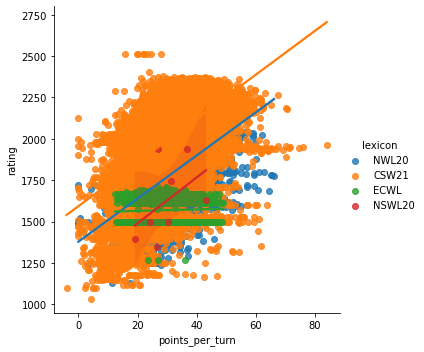

In [45]:
sns.lmplot(x="points_per_turn", y="rating", data=train_data, hue="lexicon");

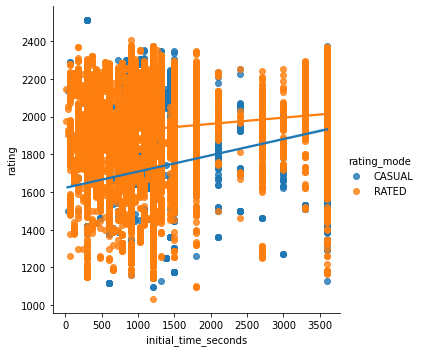

In [46]:
sns.lmplot(x="initial_time_seconds", y="rating", data=train_data, hue="rating_mode")